In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import numpy as np
from glob import glob
from pathlib import Path
import matplotlib.pyplot as plt
import pandas as pd 
import seaborn as sns
import matplotlib
from math import pow, sqrt, ceil
from collections import OrderedDict

from sklearn.metrics import accuracy_score, cohen_kappa_score, confusion_matrix

In [3]:
import warnings
warnings.filterwarnings("ignore")

In [4]:
symbols = {1: "o", 
           2: "D",
           3: '*',           
           4: "<",    
           "DL": "X",
        }

color = {1: "c",  
         2: "r",
         3: "m",
         4: "b",
         "DL": "g",
        }

offset = {1: 0.15, 
           2: 0.05,
           3: -0.05,
           4: -0.15,        
          "DL": 0
        }

In [5]:
plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams["font.size"] = 25

In [6]:
from convert_LabelBox_results import *

In [7]:
path = Path("Results")
statistics = EIPH_Statistics(path)

In [8]:
image_statistics = statistics.calc_statistics_image()
image_statistics['unchanged_boxes_ration'] = image_statistics['unchanged_boxes'] / image_statistics['num_cells']
image_statistics['changed_grade_ration'] = image_statistics['changed_grade'] / image_statistics['num_cells']
image_statistics['unchanged_boxes_ration'] = image_statistics['unchanged_boxes'] / image_statistics['num_cells']

dl_image_statistics = image_statistics[image_statistics['Initials'] == "DL"]
image_statistics = image_statistics[image_statistics['Initials'] != "DL"]

image_statistics

,Initials,Skill,File,Type,Order,Time,Grade,Grade GT,ImageType,Acc,gt_num_cells,num_cells,unchanged_boxes,changed_grade,changed_boxes,unchanged_boxes_ration,changed_grade_ration
0,LJ,3,30_EIPH_588355 Berliner Blau.png,ProjectType.CrowdAlgorithm,LabelOrder.AS,360.255,1.076923,1.500000,ImageType.NoChanges,0.666667,12,13,7,4,2,0.538462,0.307692
1,LJ,3,04_EIPH_567017 Turnbull blue-001.png,ProjectType.CrowdAlgorithm,LabelOrder.AS,321.544,1.230769,1.333333,ImageType.IncreasedGrade,1.000000,12,13,1,0,12,0.076923,0.000000
2,LJ,3,14_EIPH_568381 berliner blau-001.png,ProjectType.CrowdAlgorithm,LabelOrder.AS,533.430,2.000000,1.666667,ImageType.RemovedRects,1.000000,9,10,6,0,4,0.600000,0.000000
3,LJ,3,17_EIPH_575796 Turnbull blue.png,ProjectType.CrowdAlgorithm,LabelOrder.AS,116.749,1.666667,1.692308,ImageType.RemovedRects,0.583333,13,12,5,3,4,0.416667,0.250000
4,LJ,3,23_EIPH_563476 Berliner Blau-001.png,ProjectType.CrowdAlgorithm,LabelOrder.AS,155.112,1.714286,0.916667,ImageType.NoChanges,0.727273,12,14,6,0,8,0.428571,0.000000
5,LJ,3,25_EIPH_568150 Berliner Blau.png,ProjectType.CrowdAlgorithm,LabelOrder.AS,98.940,1.888889,1.666667,ImageType.NoChanges,0.777778,9,9,7,0,2,0.777778,0.000000
6,LJ,3,28_EIPH_569948 L berliner blau.png,ProjectType.CrowdAlgorithm,LabelOrder.AS,94.321,0.111111,0.142857,ImageType.RemovedRects,1.000000,7,9,1,0,8,0.111111,0.000000
7,LJ,3,01_EIPH_563479 Turnbull blue.png,ProjectType.CrowdAlgorithm,LabelOrder.AS,113.190,2.000000,1.700000,ImageType.IncreasedGrade,0.500000,10,10,2,3,5,0.200000,0.300000
8,LJ,3,08_EIPH_574999 Berliner Blau.png,ProjectType.CrowdAlgorithm,LabelOrder.AS,101.599,2.571429,2.000000,ImageType.IncreasedGrade,0.428571,14,14,1,8,5,0.071429,0.571429
9,LJ,3,15_EIPH_568320 berliner blau.png,ProjectType.CrowdAlgorithm,LabelOrder.AS,51.651,1.666667,1.583333,ImageType.NoChanges,0.833333,12,12,11,1,0,0.916667,0.083333


In [9]:
dl_image_statistics

,Initials,Skill,File,Type,Order,Time,Grade,Grade GT,ImageType,Acc,gt_num_cells,num_cells,unchanged_boxes,changed_grade,changed_boxes,unchanged_boxes_ration,changed_grade_ration
40,DL,DL,30_EIPH_588355 Berliner Blau.png,ProjectType.CrowdAlgorithm,LabelOrder.AS,7.908,1.076923,1.500000,ImageType.NoChanges,0.500000,12,13,6,5,2,0.461538,0.384615
41,DL,DL,04_EIPH_567017 Turnbull blue-001.png,ProjectType.CrowdAlgorithm,LabelOrder.AS,2.601,1.000000,1.333333,ImageType.IncreasedGrade,0.750000,12,13,9,3,1,0.692308,0.230769
42,DL,DL,14_EIPH_568381 berliner blau-001.png,ProjectType.CrowdAlgorithm,LabelOrder.AS,3.431,1.666667,1.666667,ImageType.RemovedRects,0.777778,9,9,7,2,0,0.777778,0.222222
43,DL,DL,17_EIPH_575796 Turnbull blue.png,ProjectType.CrowdAlgorithm,LabelOrder.AS,7.306,1.500000,1.692308,ImageType.RemovedRects,0.750000,13,12,9,3,0,0.750000,0.250000
44,DL,DL,23_EIPH_563476 Berliner Blau-001.png,ProjectType.CrowdAlgorithm,LabelOrder.AS,2.018,1.083333,0.916667,ImageType.NoChanges,0.818182,12,12,9,2,1,0.750000,0.166667
45,DL,DL,25_EIPH_568150 Berliner Blau.png,ProjectType.CrowdAlgorithm,LabelOrder.AS,2.634,1.444444,1.666667,ImageType.NoChanges,0.777778,9,9,7,2,0,0.777778,0.222222
46,DL,DL,28_EIPH_569948 L berliner blau.png,ProjectType.CrowdAlgorithm,LabelOrder.AS,2.617,0.111111,0.142857,ImageType.RemovedRects,1.000000,7,9,7,0,2,0.777778,0.000000
47,DL,DL,01_EIPH_563479 Turnbull blue.png,ProjectType.CrowdAlgorithm,LabelOrder.AS,2.326,1.333333,1.700000,ImageType.IncreasedGrade,0.666667,10,9,6,3,0,0.666667,0.333333
48,DL,DL,08_EIPH_574999 Berliner Blau.png,ProjectType.CrowdAlgorithm,LabelOrder.AS,1.690,1.857143,2.000000,ImageType.IncreasedGrade,0.857143,14,14,11,2,1,0.785714,0.142857
49,DL,DL,15_EIPH_568320 berliner blau.png,ProjectType.CrowdAlgorithm,LabelOrder.AS,2.619,1.583333,1.583333,ImageType.NoChanges,0.750000,12,12,10,2,0,0.833333,0.166667


In [10]:
set(image_statistics['Initials'])

{'BT',
 'CB',
 'DSS',
 'HJ',
 'JA',
 'JM',
 'JS',
 'KJ',
 'LJ',
 'LM',
 'MB',
 'MH',
 'MS',
 'PA',
 'PM',
 'RK',
 'SC',
 'SE',
 'SG',
 'SO'}

In [11]:
# Annotation  -> ImageType.NoChanges
annotation = image_statistics[image_statistics['Type'] == ProjectType.CrowdAlgorithm]


for column in ['unchanged_boxes_ration', 'unchanged_boxes', 'changed_grade', 'changed_boxes', 'Time']:
    for type_name in [ImageType.NoChanges, ImageType.IncreasedGrade, ImageType.RemovedRects]:
    
        image_type = annotation[annotation['ImageType'] == type_name]
    
        
        df = image_type[image_type['Initials'] != "DL"][column] 
        
        print( str(type_name) + " " + column + ": Min: {0:.2f} Max: {1:.2f}  Mean: {2:.2f}  STD: {3:.2f}".format(np.min(df), np.max(df), np.mean(df), np.std(df)))
        
    print("")
    print("")

ImageType.NoChanges unchanged_boxes_ration: Min: 0.00 Max: 1.00  Mean: 0.67  STD: 0.29
ImageType.IncreasedGrade unchanged_boxes_ration: Min: 0.00 Max: 0.93  Mean: 0.20  STD: 0.23
ImageType.RemovedRects unchanged_boxes_ration: Min: 0.00 Max: 1.00  Mean: 0.64  STD: 0.29


ImageType.NoChanges unchanged_boxes: Min: 0.00 Max: 13.00  Mean: 8.00  STD: 3.53
ImageType.IncreasedGrade unchanged_boxes: Min: 0.00 Max: 13.00  Mean: 2.18  STD: 2.53
ImageType.RemovedRects unchanged_boxes: Min: 0.00 Max: 15.00  Mean: 7.45  STD: 4.01


ImageType.NoChanges changed_grade: Min: 0.00 Max: 5.00  Mean: 0.92  STD: 1.12
ImageType.IncreasedGrade changed_grade: Min: 0.00 Max: 12.00  Mean: 5.36  STD: 3.99
ImageType.RemovedRects changed_grade: Min: 0.00 Max: 3.00  Mean: 0.63  STD: 1.02


ImageType.NoChanges changed_boxes: Min: 0.00 Max: 14.00  Mean: 3.18  STD: 3.72
ImageType.IncreasedGrade changed_boxes: Min: 0.00 Max: 16.00  Mean: 4.14  STD: 4.25
ImageType.RemovedRects changed_boxes: Min: 0.00 Max: 17.00  Mean: 3.

In [12]:
image_statistics['num_cells'].sum()

9524

In [13]:
"Num contributors: {}".format(len(set(image_statistics['Initials'])))

'Num contributors: 20'

In [14]:
for i in range(1,5):
    print("Num contributors: {0} per skill level: {1}".format(len(set(image_statistics[image_statistics['Skill'] == i]['Initials'])), i))

Num contributors: 5 per skill level: 1
Num contributors: 5 per skill level: 2
Num contributors: 5 per skill level: 3
Num contributors: 5 per skill level: 4


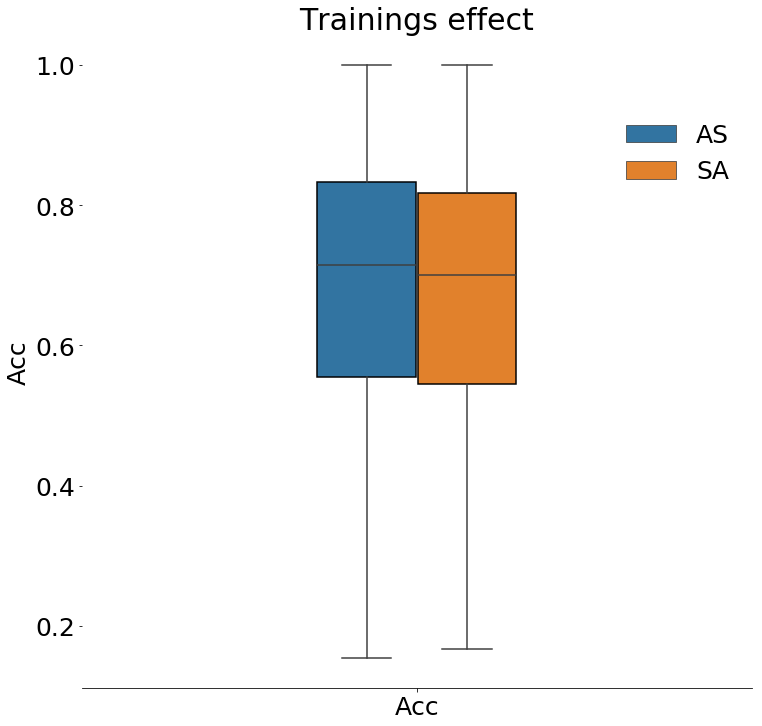

In [15]:
acc_statistics = image_statistics[image_statistics['Type'] == ProjectType.Annotation]


f, ax = plt.subplots(figsize=(12, 12))

columns = ['Acc']
temp_data = pd.melt(acc_statistics[columns])
temp_data['Order'] = len(columns) * [str(type).split('.')[-1] for type in list(acc_statistics['Order'].values)]
ax = sns.boxplot(x="variable", y="value", data=temp_data, width=.3,  showfliers=False, hue='Order') #
#ax.set(ylim=(0.55, 1))


for i,box in enumerate(ax.artists):
    box.set_edgecolor('black')
    #box.set_facecolor('white')

#ax.xaxis.grid(True)
#ax.yaxis.grid(True)

handles, labels = plt.gca().get_legend_handles_labels()
by_label = OrderedDict(zip(labels, handles))

ax.legend(by_label.values(), by_label.keys(), bbox_to_anchor=(1., 0.9), prop={'size': 25}, frameon=False)

ax.set(ylabel="Acc", xlabel="", title="Trainings effect")
sns.despine(left=True)

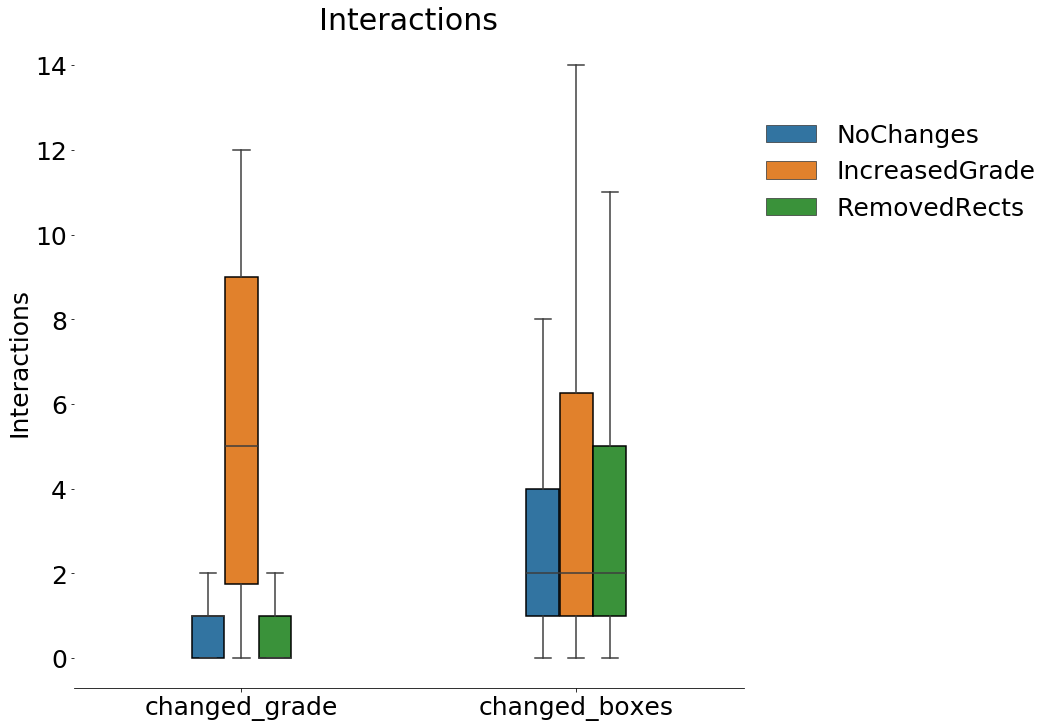

In [16]:
time_statistics = image_statistics[image_statistics['Type'] == ProjectType.CrowdAlgorithm]


f, ax = plt.subplots(figsize=(12, 12))

columns = ['changed_grade', 'changed_boxes']
temp_data = pd.melt(time_statistics[columns])
temp_data['ImageType'] = len(columns) * [str(type).split('.')[-1] for type in list(time_statistics['ImageType'].values)]
ax = sns.boxplot(x="variable", y="value", data=temp_data, width=.3,  showfliers=False, hue='ImageType') #
#ax.set(ylim=(0.55, 1))


for i,box in enumerate(ax.artists):
    box.set_edgecolor('black')
    #box.set_facecolor('white')

#ax.xaxis.grid(True)
#ax.yaxis.grid(True)

handles, labels = plt.gca().get_legend_handles_labels()
by_label = OrderedDict(zip(labels, handles))

ax.legend(by_label.values(), by_label.keys(), bbox_to_anchor=(1., 0.9), prop={'size': 25}, frameon=False)

ax.set(ylabel="Interactions", xlabel="", title="Interactions")
sns.despine(left=True)

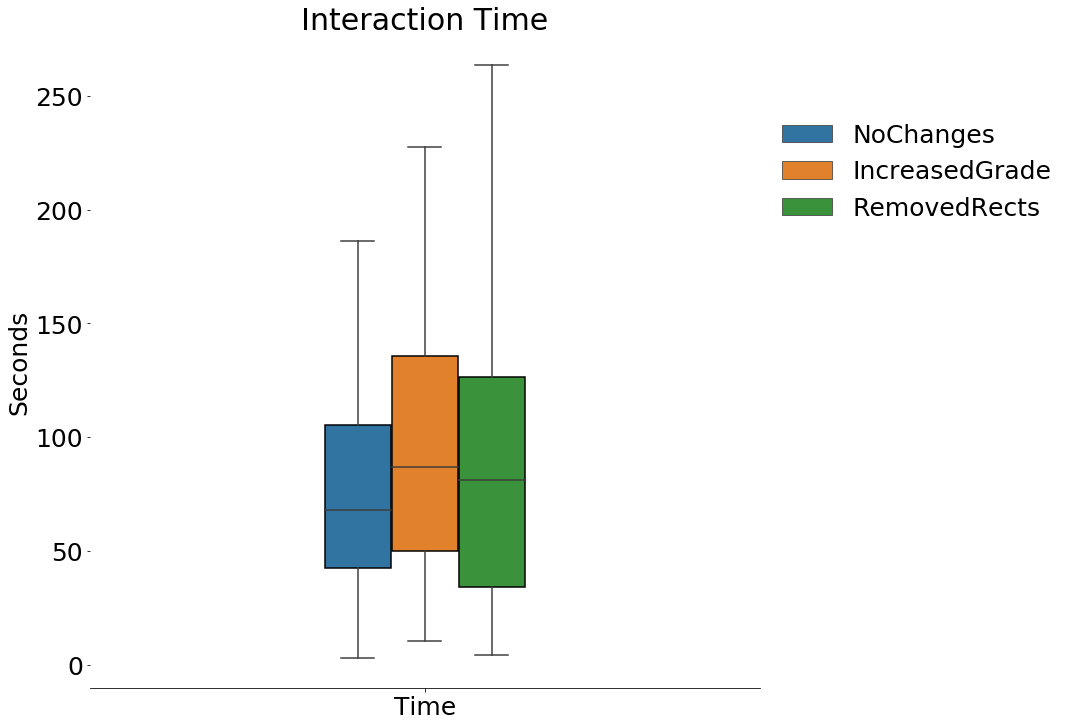

In [17]:
time_statistics = image_statistics[image_statistics['Type'] == ProjectType.CrowdAlgorithm]


f, ax = plt.subplots(figsize=(12, 12))

columns = ['Time']
temp_data = pd.melt(time_statistics[columns])
temp_data['ImageType'] = len(columns) * [str(type).split('.')[-1] for type in list(time_statistics['ImageType'].values)]
ax = sns.boxplot(x="variable", y="value", data=temp_data, width=.3,  showfliers=False, hue='ImageType') #
#ax.set(ylim=(0.55, 1))


for i,box in enumerate(ax.artists):
    box.set_edgecolor('black')
    #box.set_facecolor('white')

#ax.xaxis.grid(True)
#ax.yaxis.grid(True)

handles, labels = plt.gca().get_legend_handles_labels()
by_label = OrderedDict(zip(labels, handles))

ax.legend(by_label.values(), by_label.keys(), bbox_to_anchor=(1., 0.9), prop={'size': 25}, frameon=False)

ax.set(ylabel="Seconds", xlabel="", title="Interaction Time")
sns.despine(left=True)

In [18]:
statistics_intra_observer = statistics.calc_statistics_intra_observer()

dl_statistics_intra_observer = statistics_intra_observer[statistics_intra_observer['Initials'] == "DL"]
statistics_intra_observer = statistics_intra_observer[statistics_intra_observer['Initials'] != "DL"]

statistics_intra_observer

,Initials,Skill,Order,Grade-Error,Kappa,mAP,mAP-IG,Acc
0,LJ,3,LabelOrder.AS,0.102888,0.707213,0.638740,0.873534,0.772727
2,JS,1,LabelOrder.AS,-0.144957,0.775178,0.653328,0.852950,0.826484
3,MB,3,LabelOrder.SA,0.102864,0.635367,0.473234,0.794824,0.732057
4,DSS,3,LabelOrder.AS,-0.272886,0.437763,0.360375,0.788714,0.567961
5,PA,4,LabelOrder.SA,-0.191163,0.546219,0.466292,0.850343,0.651376
6,LM,3,LabelOrder.SA,-0.168487,0.579377,0.492164,0.843734,0.669811
7,SE,2,LabelOrder.SA,0.133080,0.565379,0.392915,0.746324,0.669643
8,RK,4,LabelOrder.SA,-0.116392,0.587849,0.406171,0.795050,0.676768
9,CB,4,LabelOrder.AS,0.027955,0.811753,0.748701,0.915706,0.860987
10,MH,3,LabelOrder.AS,0.009284,0.831000,0.730057,0.848606,0.868778


In [19]:
for column in ['Acc', 'Kappa', 'mAP', 'Grade-Error']:
    df = statistics_intra_observer[statistics_intra_observer['Initials'] != "DL"][column] 
    print(column + ": Min: {} Max: {}  Mean: {}  STD: {}".format(np.min(df), np.max(df), np.mean(df), np.std(df)))

Acc: Min: 0.5608465608465608 Max: 0.8687782805429864  Mean: 0.6887945915988166  STD: 0.08892430034801012
Kappa: Min: 0.4310945093203743 Max: 0.830999657200116  Mean: 0.5963107321640465  STD: 0.11416919418397228
mAP: Min: 0.2638226660981201 Max: 0.7487008327366522  Mean: 0.460522618680354  STD: 0.1317637379930873
Grade-Error: Min: -0.27310703185703145 Max: 0.3002140732074945  Mean: -0.05000459274706413  STD: 0.15820318726139843


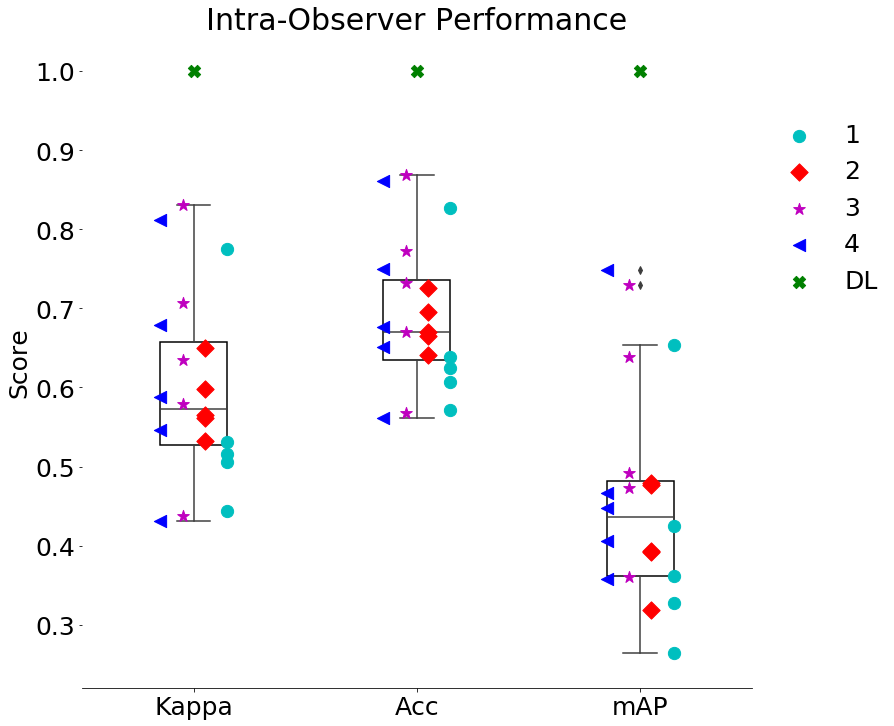

In [20]:
f, ax = plt.subplots(figsize=(12, 12))

temp_data = pd.melt(statistics_intra_observer[['Kappa', 'Acc', 'mAP']]) #, 'mAP-IG'
ax = sns.boxplot(x="variable", y="value", data=temp_data, width=.3,  showfliers=True) #
#ax.set(ylim=(0.55, 1))


for i,box in enumerate(ax.artists):
    box.set_edgecolor('black')
    box.set_facecolor('white')

for index, row in enumerate(statistics_intra_observer.sort_values(by=['Skill']).values.tolist()):
    name = row[1]
    kappa = row[4]
    mAP = row[5]
    mAP_IG = row[6]
    acc = row[7]

    plt.scatter(x=0 + offset[name], y=kappa, marker=symbols[name], s=150, c=color[name], zorder=100)
    plt.scatter(x=1 + offset[name], y=acc, marker=symbols[name], s=150, c=color[name], zorder=100)
    
    plt.scatter(x=2 + offset[name], y=mAP, marker=symbols[name], label=name, s=150, c=color[name], zorder=100)
    #plt.scatter(x=3 + offset[name], y=mAP_IG, marker=symbols[name], s=150, c=color[name], zorder=100)
    
# DL results:
for index, row in enumerate(dl_statistics_intra_observer.values.tolist()):
    name = row[1]
    kappa = 1#row[4]
    mAP = 1#row[5]
    mAP_IG = 1#row[6]
    acc = 1#row[7]

    plt.scatter(x=0 + offset[name], y=kappa, marker=symbols[name], s=150, c=color[name], zorder=100)
    plt.scatter(x=1 + offset[name], y=acc, marker=symbols[name], s=150, c=color[name], zorder=100)
    
    plt.scatter(x=2 + offset[name], y=mAP, marker=symbols[name], label=name, s=150, c=color[name], zorder=100)
    

#ax.xaxis.grid(True)
#ax.yaxis.grid(True)

handles, labels = plt.gca().get_legend_handles_labels()
by_label = OrderedDict(zip(labels, handles))

ax.legend(by_label.values(), by_label.keys(), bbox_to_anchor=(1., 0.9), prop={'size': 25}, frameon=False)

ax.set(ylabel="Score", xlabel="", title="Intra-Observer Performance")
sns.despine(left=True)

plt.savefig("IntraObserverPerformance.pdf", transparent=True)

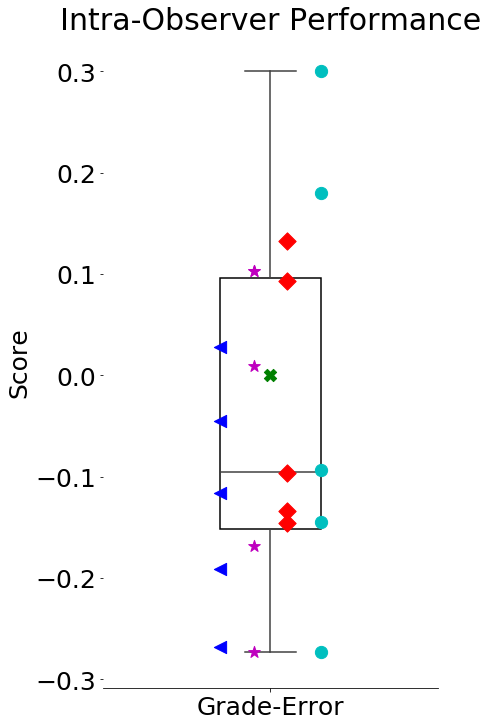

In [21]:
from collections import OrderedDict

f, ax = plt.subplots(figsize=(6, 12))

temp_data = pd.melt(statistics_intra_observer[['Grade-Error']])
ax = sns.boxplot(x="variable", y="value", data=temp_data, width=.3,  showfliers=False, whis=[0, 100]) #
#ax.set(ylim=(0.55, 1))


for i,box in enumerate(ax.artists):
    box.set_edgecolor('black')
    box.set_facecolor('white')
    
for index, row in enumerate(statistics_intra_observer.values.tolist()):
    name = row[1]
    grade = row[3]

    plt.scatter(x=0 + offset[name], y=grade, marker=symbols[name], s=150, c=color[name], zorder=100)
    
for index, row in enumerate(dl_statistics_intra_observer.values.tolist()):
    name = row[1]
    grade = row[3]

    plt.scatter(x=0 + offset[name], y=grade, marker=symbols[name], s=150, c=color[name], zorder=100)
    
#ax.xaxis.grid(True)
#ax.yaxis.grid(True)

handles, labels = plt.gca().get_legend_handles_labels()
by_label = OrderedDict(zip(labels, handles))

ax.legend(by_label.values(), by_label.keys(), bbox_to_anchor=(1., 0.9), prop={'size': 25}, frameon=False)

ax.set(ylabel="Score", xlabel="", title="Intra-Observer Performance")
sns.despine(left=True)

In [22]:
statistics_initials = statistics.calc_statistics_initials()

dl_statistics_initials = statistics_initials[statistics_initials['Initials'] == "DL"]
statistics_initials = statistics_initials[statistics_initials['Initials'] != "DL"]

statistics_initials

,Initials,Skill,mAP,mAP-IG,Acc,ratio_decreased_cells,ratio_removed_boxes,seconds,grade,num_cells,num_interactionen,Order,Type
0,LJ,3,0.589968,0.909977,0.750000,47.272727,100.0,113.2155,1.448717,238,NaN,LabelOrder.AS,ProjectType.CrowdAlgorithm
1,LJ,3,0.498623,0.857983,0.674528,40.740741,80.0,118.7975,1.345829,232,NaN,LabelOrder.AS,ProjectType.Annotation
4,JS,1,0.658129,0.927085,0.825112,55.769231,100.0,93.2930,1.449369,235,NaN,LabelOrder.AS,ProjectType.CrowdAlgorithm
5,JS,1,0.509945,0.800145,0.710900,45.283019,80.0,134.3665,1.594326,243,NaN,LabelOrder.AS,ProjectType.Annotation
6,MB,3,0.583423,0.925835,0.776824,32.727273,60.0,79.5860,1.529922,241,NaN,LabelOrder.SA,ProjectType.CrowdAlgorithm
7,MB,3,0.590276,0.813106,0.796020,56.603774,100.0,93.3775,1.427058,218,NaN,LabelOrder.SA,ProjectType.Annotation
8,DSS,3,0.501903,0.944191,0.709251,27.272727,80.0,24.0370,1.544626,238,NaN,LabelOrder.AS,ProjectType.CrowdAlgorithm
9,DSS,3,0.346627,0.781040,0.530303,41.176471,100.0,76.3840,1.817512,219,NaN,LabelOrder.AS,ProjectType.Annotation
10,PA,4,0.577649,0.917297,0.743243,32.727273,60.0,117.2520,1.542089,232,NaN,LabelOrder.SA,ProjectType.CrowdAlgorithm
11,PA,4,0.497812,0.855991,0.623318,41.176471,100.0,120.5505,1.733252,242,NaN,LabelOrder.SA,ProjectType.Annotation


In [23]:
# Annotation
annotation = statistics_initials[statistics_initials['Type'] == ProjectType.Annotation]

for column in ['Acc', 'mAP', 'mAP-IG', 'seconds', 'grade']:
    df = annotation[annotation['Initials'] != "DL"][column] 
    print(column + ": Min: {0:.2f} Max: {1:.2f}  Mean: {2:.2f}  STD: {3:.2f}".format(np.min(df), np.max(df), np.mean(df), np.std(df)))

Acc: Min: 0.53 Max: 0.86  Mean: 0.67  STD: 0.07
mAP: Min: 0.29 Max: 0.68  Mean: 0.47  STD: 0.09
mAP-IG: Min: 0.47 Max: 0.91  Mean: 0.78  STD: 0.10
seconds: Min: 48.00 Max: 237.93  Mean: 106.22  STD: 46.84
grade: Min: 1.21 Max: 1.85  Mean: 1.58  STD: 0.19


In [24]:
# Supervision

supervision = statistics_initials[statistics_initials['Type'] == ProjectType.CrowdAlgorithm]
for column in ['Acc', 'mAP', 'mAP-IG', 'seconds', 'grade']:
    df = supervision[supervision['Initials'] != "DL"][column] 
    
    print(column + ": Min: {0:.2f} Max: {1:.2f}  Mean: {2:.2f}  STD: {3:.2f}".format(np.min(df), np.max(df), np.mean(df), np.std(df)))

Acc: Min: 0.67 Max: 0.89  Mean: 0.74  STD: 0.06
mAP: Min: 0.47 Max: 0.78  Mean: 0.55  STD: 0.08
mAP-IG: Min: 0.78 Max: 0.96  Mean: 0.92  STD: 0.04
seconds: Min: 11.06 Max: 138.33  Mean: 74.34  STD: 33.58
grade: Min: 1.32 Max: 1.66  Mean: 1.53  STD: 0.09


In [25]:
(statistics_initials['seconds'].sum() * 20) / 60

1203.7248333333334

In [26]:
acc_statistics

,Initials,Skill,File,Type,Order,Time,Grade,Grade GT,ImageType,Acc,gt_num_cells,num_cells,unchanged_boxes,changed_grade,changed_boxes,unchanged_boxes_ration,changed_grade_ration
20,LJ,3,30_EIPH_588355 Berliner Blau.png,ProjectType.Annotation,LabelOrder.AS,216.363,1.230769,1.500000,ImageType.NoChanges,0.833333,12,13,0,0,13,0.0,0.0
21,LJ,3,04_EIPH_567017 Turnbull blue-001.png,ProjectType.Annotation,LabelOrder.AS,132.819,1.166667,1.333333,ImageType.IncreasedGrade,0.833333,12,12,0,0,12,0.0,0.0
22,LJ,3,14_EIPH_568381 berliner blau-001.png,ProjectType.Annotation,LabelOrder.AS,257.089,2.111111,1.666667,ImageType.RemovedRects,0.571429,9,9,0,0,9,0.0,0.0
23,LJ,3,17_EIPH_575796 Turnbull blue.png,ProjectType.Annotation,LabelOrder.AS,171.467,1.636364,1.692308,ImageType.RemovedRects,0.700000,13,11,0,0,11,0.0,0.0
24,LJ,3,23_EIPH_563476 Berliner Blau-001.png,ProjectType.Annotation,LabelOrder.AS,142.989,1.642857,0.916667,ImageType.NoChanges,0.750000,12,14,0,0,14,0.0,0.0
25,LJ,3,25_EIPH_568150 Berliner Blau.png,ProjectType.Annotation,LabelOrder.AS,113.452,2.142857,1.666667,ImageType.NoChanges,0.857143,9,7,0,0,7,0.0,0.0
26,LJ,3,28_EIPH_569948 L berliner blau.png,ProjectType.Annotation,LabelOrder.AS,61.143,0.000000,0.142857,ImageType.RemovedRects,0.666667,7,3,0,0,3,0.0,0.0
27,LJ,3,01_EIPH_563479 Turnbull blue.png,ProjectType.Annotation,LabelOrder.AS,106.618,1.700000,1.700000,ImageType.IncreasedGrade,0.800000,10,10,0,0,10,0.0,0.0
28,LJ,3,08_EIPH_574999 Berliner Blau.png,ProjectType.Annotation,LabelOrder.AS,124.143,2.600000,2.000000,ImageType.IncreasedGrade,0.384615,14,15,0,0,15,0.0,0.0
29,LJ,3,15_EIPH_568320 berliner blau.png,ProjectType.Annotation,LabelOrder.AS,78.334,1.454545,1.583333,ImageType.NoChanges,0.636364,12,11,0,0,11,0.0,0.0


In [27]:
# Annotation -> LabelOrder.SA
annotation = statistics_initials[statistics_initials['Type'] == ProjectType.Annotation]
sa_mode =  annotation[annotation['Order'] == LabelOrder.SA] 

for column in ['Acc', 'mAP', 'seconds', 'grade']:
    df = sa_mode[sa_mode['Initials'] != "DL"][column] 
    print(column + ": Min: {0:.2f} Max: {1:.2f}  Mean: {2:.2f}  STD: {3:.2f}".format(np.min(df), np.max(df), np.mean(df), np.std(df)))

Acc: Min: 0.59 Max: 0.80  Mean: 0.67  STD: 0.06
mAP: Min: 0.44 Max: 0.59  Mean: 0.48  STD: 0.04
seconds: Min: 48.92 Max: 121.73  Mean: 91.60  STD: 23.54
grade: Min: 1.21 Max: 1.85  Mean: 1.60  STD: 0.20


In [28]:
# Annotation -> LabelOrder.AS
annotation = statistics_initials[statistics_initials['Type'] == ProjectType.Annotation]
as_mode =  annotation[annotation['Order'] == LabelOrder.AS] 

for column in ['Acc', 'mAP', 'seconds', 'grade']:
    df = as_mode[as_mode['Initials'] != "DL"][column] 
    print(column + ": Min: {0:.2f} Max: {1:.2f}  Mean: {2:.2f}  STD: {3:.2f}".format(np.min(df), np.max(df), np.mean(df), np.std(df)))

Acc: Min: 0.53 Max: 0.86  Mean: 0.68  STD: 0.08
mAP: Min: 0.29 Max: 0.68  Mean: 0.46  STD: 0.11
seconds: Min: 48.00 Max: 237.93  Mean: 118.18  STD: 56.72
grade: Min: 1.31 Max: 1.82  Mean: 1.57  STD: 0.17


In [29]:
statistics_initials_supervision = statistics_initials[statistics_initials['Type'] == ProjectType.CrowdAlgorithm]

dl_statistics_initials_supervision = statistics_initials_supervision[statistics_initials_supervision['Initials'] == "DL"]
statistics_initials_supervision = statistics_initials_supervision[statistics_initials_supervision['Initials'] != "DL"]

statistics_initials_supervision

,Initials,Skill,mAP,mAP-IG,Acc,ratio_decreased_cells,ratio_removed_boxes,seconds,grade,num_cells,num_interactionen,Order,Type
0,LJ,3,0.589968,0.909977,0.750000,47.272727,100.0,113.2155,1.448717,238,NaN,LabelOrder.AS,ProjectType.CrowdAlgorithm
4,JS,1,0.658129,0.927085,0.825112,55.769231,100.0,93.2930,1.449369,235,NaN,LabelOrder.AS,ProjectType.CrowdAlgorithm
6,MB,3,0.583423,0.925835,0.776824,32.727273,60.0,79.5860,1.529922,241,NaN,LabelOrder.SA,ProjectType.CrowdAlgorithm
8,DSS,3,0.501903,0.944191,0.709251,27.272727,80.0,24.0370,1.544626,238,NaN,LabelOrder.AS,ProjectType.CrowdAlgorithm
10,PA,4,0.577649,0.917297,0.743243,32.727273,60.0,117.2520,1.542089,232,NaN,LabelOrder.SA,ProjectType.CrowdAlgorithm
12,LM,3,0.468365,0.930199,0.678571,18.181818,80.0,67.7755,1.647687,236,NaN,LabelOrder.SA,ProjectType.CrowdAlgorithm
14,SE,2,0.518407,0.921627,0.733333,23.636364,100.0,81.9200,1.532446,242,NaN,LabelOrder.SA,ProjectType.CrowdAlgorithm
16,RK,4,0.543241,0.938519,0.747748,38.181818,60.0,53.4530,1.539760,229,NaN,LabelOrder.SA,ProjectType.CrowdAlgorithm
18,CB,4,0.664171,0.934547,0.840708,54.545455,80.0,138.3255,1.337494,237,NaN,LabelOrder.AS,ProjectType.CrowdAlgorithm
20,MH,3,0.578463,0.914132,0.726457,28.301887,60.0,119.7415,1.602292,235,NaN,LabelOrder.AS,ProjectType.CrowdAlgorithm


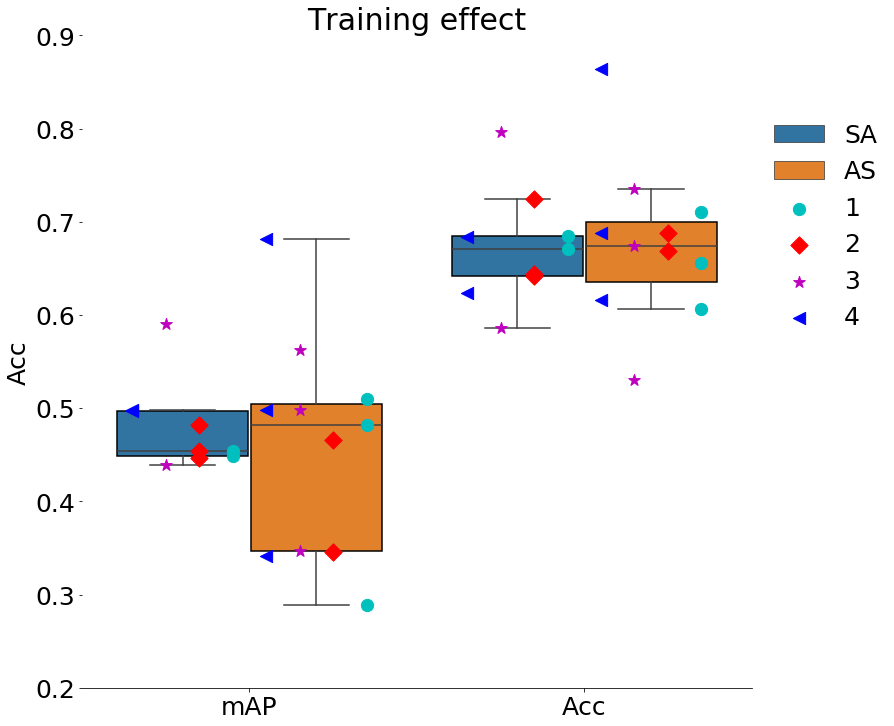

In [30]:
acc_statistics = statistics_initials[statistics_initials['Type'] == ProjectType.Annotation]
acc_statistics = acc_statistics[acc_statistics['Initials'] != "DL"]

f, ax = plt.subplots(figsize=(12, 12))

columns = ['Acc', 'mAP']
temp_data = pd.melt(acc_statistics[columns])
temp_data['Order'] = len(columns) * [str(type).split('.')[-1] for type in list(acc_statistics['Order'].values)]
ax = sns.boxplot(x="variable", y="value", data=temp_data.sort_values(by=['Order'], ascending=False),  showfliers=False, hue='Order') #width=.3,

ax.set(ylim=(0.2, 0.9))

#ax.set(ylim=(0.55, 1))


for i,box in enumerate(ax.artists):
    box.set_edgecolor('black')
    #box.set_facecolor('white')

for index, row in enumerate(acc_statistics.sort_values(by=['Skill']).values.tolist()):
    name = row[1]
    
    type = str(row[-2])
    acc = row[4]
    mAP = row[2]

    #type_offset = -0.075
    type_offset = -0.2
    if "AS" in type:
        type_offset = type_offset * -1
        
    plt.scatter(x=1 + offset[name] + type_offset, y=acc, marker=symbols[name], label=name, s=150, c=color[name], zorder=100)    
    plt.scatter(x=0 + offset[name] + type_offset, y=mAP, marker=symbols[name], label=name, s=150, c=color[name], zorder=100)    

    
#ax.xaxis.grid(True)
#ax.yaxis.grid(True)

handles, labels = plt.gca().get_legend_handles_labels()
by_label = OrderedDict(zip(labels, handles))

ax.legend(by_label.values(), by_label.keys(), bbox_to_anchor=(1., 0.9), prop={'size': 25}, frameon=False)

ax.set(ylabel="Acc", xlabel="", title="Training effect")
sns.despine(left=True)

plt.savefig("TrainingsEffect.pdf", transparent=True)

In [31]:
def make_autopct(values):
    def my_autopct(pct):
        total = sum(values)
        val = int(round(pct*total/100.0))
        return '{v:d}%'.format(v=val)
    return my_autopct

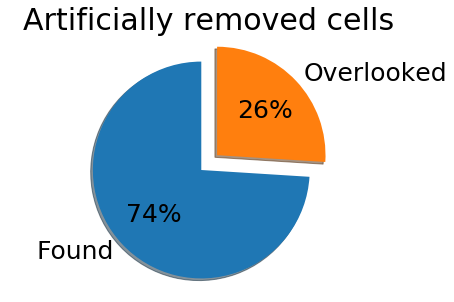

In [32]:
found = np.mean(statistics_initials_supervision["ratio_removed_boxes"].values)
not_found = 100 - found

labels = ['Found', 'Overlooked']
sizes = [found, not_found]
explode = (0.1, 0.1)  

fig1, ax1 = plt.subplots()

ax1.set_title('Artificially removed cells')
#ax1.set_xlabel('Grade with cell count')

ax1.pie(sizes, explode=explode, labels=labels, #, colors = ['b', 'g', 'r', 'c', 'm']
        shadow=True, startangle=90, autopct=make_autopct(sizes))
# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal') 

plt.tight_layout(pad=0)
plt.show()

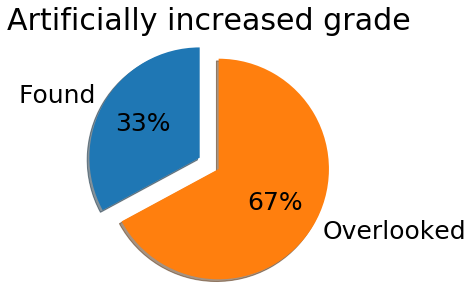

In [33]:
found = np.mean(statistics_initials_supervision["ratio_decreased_cells"].values)
not_found = 100 - found

labels = ['Found', 'Overlooked']
sizes = [found, not_found]
explode = (0.1, 0.1)  

fig1, ax1 = plt.subplots()

ax1.set_title('Artificially increased grade')
#ax1.set_xlabel('Grade with cell count')

ax1.pie(sizes, explode=explode, labels=labels, #, colors = ['b', 'g', 'r', 'c', 'm']
        shadow=True, startangle=90, autopct=make_autopct(sizes))
# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal') 

plt.tight_layout(pad=0)
plt.show()

In [34]:
columns = ['Acc', 'mAP'] #, 'mAP-IG'
statistics_initials_melt = pd.melt(statistics_initials[ columns ])
statistics_initials_melt['Type'] = len(columns) * [str(type).split('.')[-1] for type in list(statistics_initials['Type'].values)]

In [35]:
statistics_initials.sort_values(by=['Skill'])

,Initials,Skill,mAP,mAP-IG,Acc,ratio_decreased_cells,ratio_removed_boxes,seconds,grade,num_cells,num_interactionen,Order,Type
23,JA,1,0.453712,0.781514,0.671362,37.735849,80.0,106.2130,1.207489,254,NaN,LabelOrder.SA,ProjectType.Annotation
4,JS,1,0.658129,0.927085,0.825112,55.769231,100.0,93.2930,1.449369,235,NaN,LabelOrder.AS,ProjectType.CrowdAlgorithm
5,JS,1,0.509945,0.800145,0.710900,45.283019,80.0,134.3665,1.594326,243,NaN,LabelOrder.AS,ProjectType.Annotation
24,SO,1,0.495597,0.784843,0.690566,36.363636,60.0,107.3405,1.563039,284,NaN,LabelOrder.AS,ProjectType.CrowdAlgorithm
25,SO,1,0.288426,0.474567,0.655814,48.148148,100.0,237.9325,1.382994,449,NaN,LabelOrder.AS,ProjectType.Annotation
28,SC,1,0.486234,0.925993,0.713004,20.000000,60.0,71.4495,1.579943,234,NaN,LabelOrder.SA,ProjectType.CrowdAlgorithm
33,JM,1,0.482279,0.829724,0.606796,40.740741,100.0,76.7405,1.750448,227,NaN,LabelOrder.AS,ProjectType.Annotation
32,JM,1,0.493416,0.934039,0.687783,20.000000,60.0,53.0520,1.657312,228,NaN,LabelOrder.AS,ProjectType.CrowdAlgorithm
22,JA,1,0.497024,0.916462,0.718750,29.090909,80.0,91.3600,1.507703,242,NaN,LabelOrder.SA,ProjectType.CrowdAlgorithm
29,SC,1,0.448927,0.726014,0.685083,47.169811,60.0,70.7005,1.853050,194,NaN,LabelOrder.SA,ProjectType.Annotation


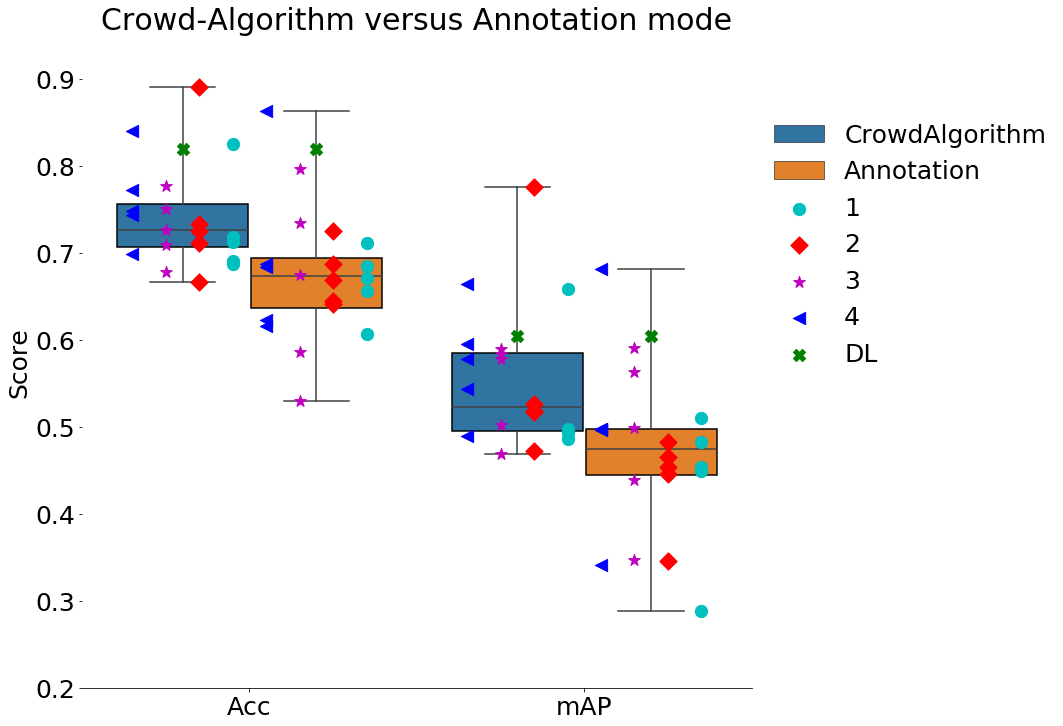

In [36]:
f, ax = plt.subplots(figsize=(12, 12))

ax = sns.boxplot(x="variable", y="value", data=statistics_initials_melt,
                 showfliers=False, hue='Type', whis=[0, 100], dodge=True) # width=.3,  
ax.set(ylim=(0.2, 0.95))


for i,box in enumerate(ax.artists):
    box.set_edgecolor('black')
    #box.set_facecolor('white')

for index, row in enumerate(statistics_initials.sort_values(by=['Skill']).values.tolist()):
    name = row[1]
    
    mAP = row[2]
    mAP_IG = row[3]
    acc = row[4]
    type = str(row[-1])

    type_offset = 0.2
    if "CrowdAlgorithm" in type:
        type_offset = type_offset * -1
        
    plt.scatter(x=0 + offset[name] + type_offset, y=acc, marker=symbols[name], s=150, c=color[name], zorder=100)    
    plt.scatter(x=1 + offset[name] + type_offset, y=mAP, marker=symbols[name], label=name, s=150, c=color[name], zorder=100)
    #plt.scatter(x=2 + offset[name] + type_offset, y=mAP_IG, marker=symbols[name], s=150, c=color[name], zorder=100)

for index, row in enumerate(dl_statistics_initials.values.tolist()):
    name = row[1]
    
    mAP = row[2]
    mAP_IG = row[3]
    acc = row[4]
    type = str(row[-1])

    type_offset = 0.2
    if "CrowdAlgorithm" in type:
        type_offset = type_offset * -1
        
    plt.scatter(x=0 + offset[name] + type_offset, y=acc, marker=symbols[name], s=150, c=color[name], zorder=100)    
    plt.scatter(x=1 + offset[name] + type_offset, y=mAP, marker=symbols[name], label=name, s=150, c=color[name], zorder=100)
    

#ax.xaxis.grid(True)
#ax.yaxis.grid(True)

handles, labels = plt.gca().get_legend_handles_labels()
by_label = OrderedDict(zip(labels, handles))

ax.legend(by_label.values(), by_label.keys(), bbox_to_anchor=(1., 0.9), prop={'size': 25}, frameon=False)

ax.set(ylabel="Score", xlabel="", title="Crowd-Algorithm versus Annotation mode")
sns.despine(left=True)

plt.savefig("SupervisionAccuracy.pdf", transparent=True)

In [37]:
columns = ['seconds']
statistics_initials_melt = pd.melt(statistics_initials[ columns ])
statistics_initials_melt['Type'] = len(columns) * [str(type).split('.')[-1] for type in list(statistics_initials['Type'].values)]

In [38]:
offset = {1: 0.05, 
           2: 0.025,
           3: -0.025,
           4: -0.05,  
          "DL": 0
        }

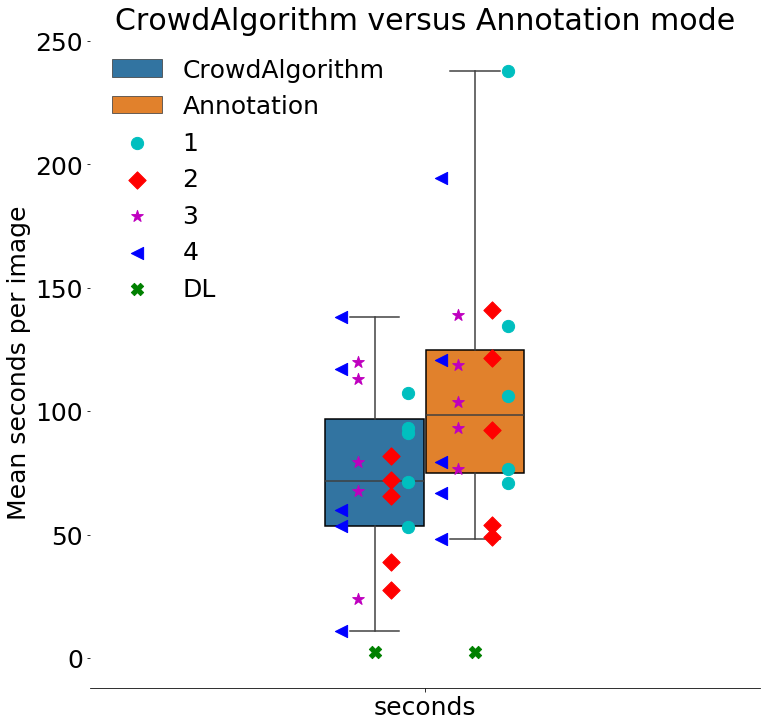

In [39]:
f, ax = plt.subplots(figsize=(12, 12))

ax = sns.boxplot(x="variable", y="value", data=statistics_initials_melt,
                 showfliers=False, hue='Type', whis=[0, 100],  width=.3, dodge=True) # width=.3,  
#ax.set(ylim=(0.55, 1))


for i,box in enumerate(ax.artists):
    box.set_edgecolor('black')
    #box.set_facecolor('white')

for index, row in enumerate(statistics_initials.sort_values(by=['Skill']).values.tolist()):
    name = row[1]
    
    type = str(row[-1])
    seconds = row[7]

    type_offset = 0.075
    if "CrowdAlgorithm" in type:
        type_offset = type_offset * -1
        
    plt.scatter(x=0 + offset[name] + type_offset, y=seconds, marker=symbols[name], label=name, s=150, c=color[name], zorder=100)    

for index, row in enumerate(dl_statistics_initials.values.tolist()):
    name = row[1]
    
    type = str(row[-1])
    seconds = row[7]

    type_offset = 0.075
    if "CrowdAlgorithm" in type:
        type_offset = type_offset * -1
        
    plt.scatter(x=0 + offset[name] + type_offset, y=seconds, marker=symbols[name], label=name, s=150, c=color[name], zorder=100)    

    
    
#ax.xaxis.grid(True)
#ax.yaxis.grid(True)

handles, labels = plt.gca().get_legend_handles_labels()
by_label = OrderedDict(zip(labels, handles))

ax.legend(by_label.values(), by_label.keys(), prop={'size': 25}, frameon=False) #, bbox_to_anchor=(1., 0.9)

ax.set(ylabel="Mean seconds per image", xlabel="", title="CrowdAlgorithm versus Annotation mode")
sns.despine(left=True)

plt.savefig("AnnotationTime.pdf", transparent=True)

In [40]:
columns = ['grade']
statistics_initials_melt = pd.melt(statistics_initials[ columns ])
statistics_initials_melt['Type'] = len(columns) * [str(type).split('.')[-1] for type in list(statistics_initials['Type'].values)]

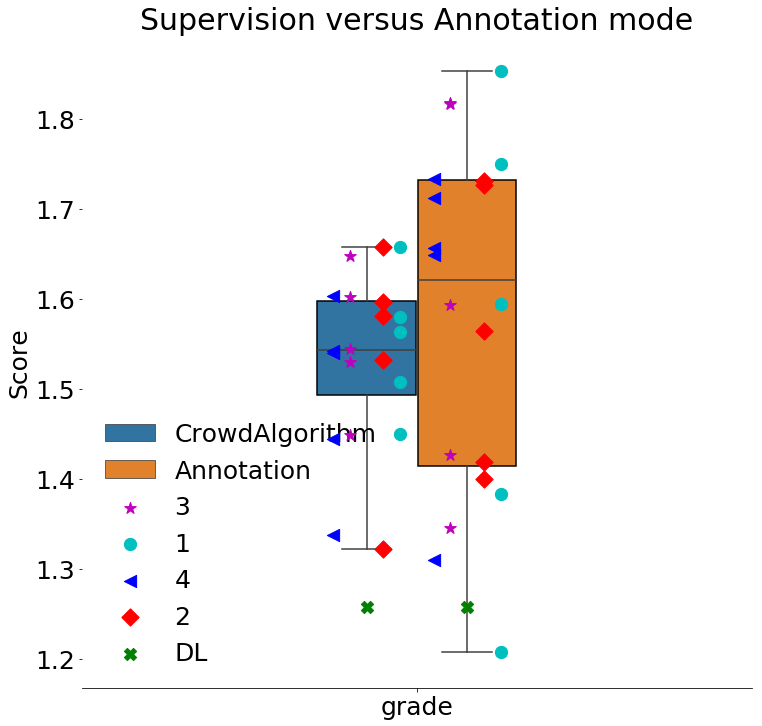

In [41]:
f, ax = plt.subplots(figsize=(12, 12))

ax = sns.boxplot(x="variable", y="value", data=statistics_initials_melt,
                 showfliers=False, hue='Type', whis=[0, 100],  width=.3, dodge=True) # width=.3,  
#ax.set(ylim=(0.55, 1))


for i,box in enumerate(ax.artists):
    box.set_edgecolor('black')
    #box.set_facecolor('white')

for index, row in enumerate(statistics_initials.values.tolist()):
    name = row[1]
    
    type = str(row[-1])
    seconds = row[8]

    type_offset = 0.075
    if "CrowdAlgorithm" in type:
        type_offset = type_offset * -1
        
    plt.scatter(x=0 + offset[name] + type_offset, y=seconds, marker=symbols[name], label=name, s=150, c=color[name], zorder=100)    


for index, row in enumerate(dl_statistics_initials.values.tolist()):
    name = row[1]
    
    type = str(row[-1])
    seconds = row[8]

    type_offset = 0.075
    if "CrowdAlgorithm" in type:
        type_offset = type_offset * -1
        
    plt.scatter(x=0 + offset[name] + type_offset, y=seconds, marker=symbols[name], label=name, s=150, c=color[name], zorder=100)    

    
#ax.xaxis.grid(True)
#ax.yaxis.grid(True)

handles, labels = plt.gca().get_legend_handles_labels()
by_label = OrderedDict(zip(labels, handles))

ax.legend(by_label.values(), by_label.keys(), prop={'size': 25}, frameon=False) #, bbox_to_anchor=(1., 0.9)

ax.set(ylabel="Score", xlabel="", title="Supervision versus Annotation mode")
sns.despine(left=True)

In [42]:
cm_annotation = statistics.calc_confusion_matrix(ProjectType.Annotation)
cm_supervision = statistics.calc_confusion_matrix(ProjectType.CrowdAlgorithm)

cm_supervision

array([[ 920,  167,   16,    2,    1],
       [  91, 1302,  308,   24,    3],
       [   1,   55,  731,  284,    4],
       [   0,    0,  103,  295,  117],
       [   0,    0,    0,   38,  280]])

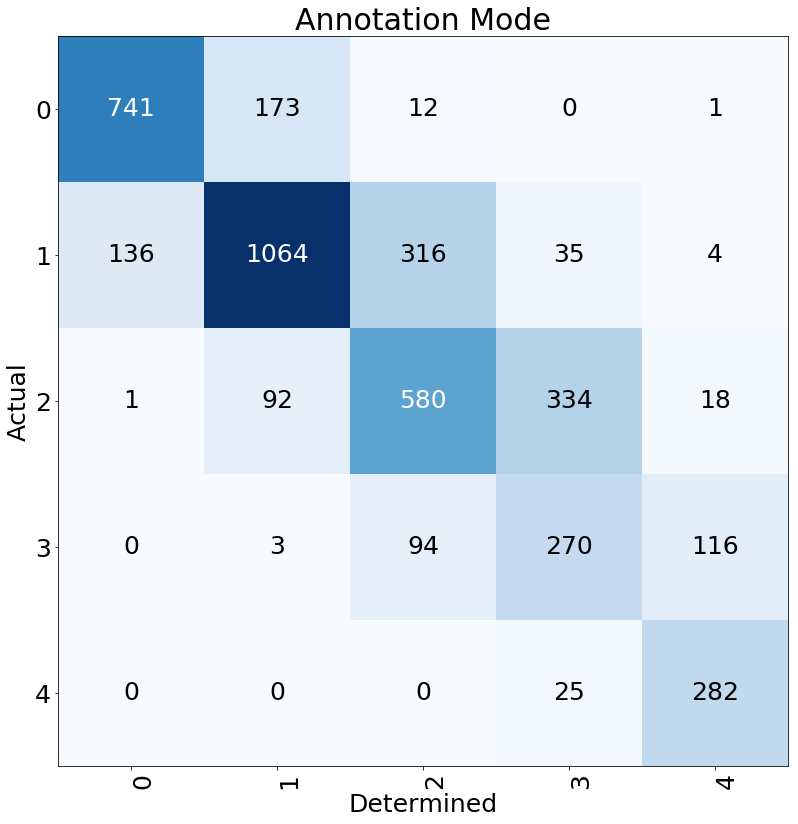

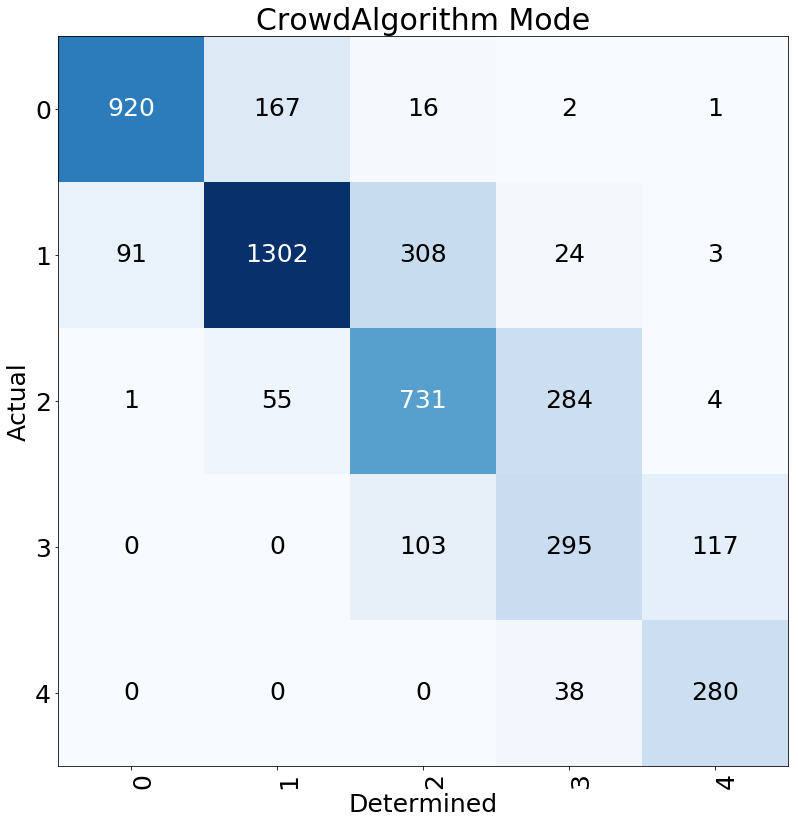

In [43]:
for title, cm in [("Annotation Mode", cm_annotation), ("CrowdAlgorithm Mode", cm_supervision)]:
    cmap = plt.cm.Blues
    fig, ax = plt.subplots(figsize=(12,12))
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)


    ax.set(xticks=np.arange(cm.shape[1]),
                   yticks=np.arange(cm.shape[0]),
                   # ... and label them with the respective list entries
                   xticklabels=[0,1,2,3,4], yticklabels=[0,1,2,3,4],
                   title=title,
                   ylabel="Actual",
                   xlabel="Determined")

    plt.setp(ax.get_xticklabels(), rotation=90, ha="right",rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = 'd'#'.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                            ha="center", va="center",
                            color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    
    plt.savefig("ConfusionMatrix_{0}.pdf".format(title), transparent=True)

### Kappa 

In [44]:
statistics.calc_fleiss_kappa(ProjectType.CrowdAlgorithm)

0.7103063394009218

In [45]:
statistics.calc_fleiss_kappa(ProjectType.Annotation)

0.5157005191268501

### Combining human results